In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import py_trees
import logging
from deep_traffic.libtraffic import env
from behavior_tree.agent import BasicBehaviorTreeAgent, GeneticProgrammingBehaviorTreeAgent
from behavior_tree.condition_checker import BasicConditionChecker, GeneticProgrammingConditionChecker
from behavior_tree.tree import BasicBehaviorTree, GeneticProgrammingBehaviorTree, ConditionSequenceNode, IntersectConditionSequenceNode
from train import train_GP_BT
from runner import play_episode, measure_performance
from config import *

In [3]:
logging.basicConfig(level=logging.INFO)

##### Environment

In [4]:
e = env.DeepTraffic(lanes_side=LANES_SIDE, 
                    patches_ahead=PATCHES_AHEAD,
                    patches_behind=PATCHES_BEHIND, 
                    history=HISTORY, 
                    obs=OBS)
obs_shape = e.obs_shape
print(obs_shape)

(7, 5, 20)


In [5]:
state = e.reset()
print(state.shape)

(7, 5, 20)


In [6]:
print(state[0].T)

[[0.0325 0.0325 1.     1.     0.0325]
 [0.0325 0.0325 0.0325 1.     0.0325]
 [0.0325 0.0325 0.0325 1.     0.0325]
 [1.     0.0325 0.0325 1.     1.    ]
 [1.     1.     0.0325 1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     0.008  1.     1.    ]
 [1.     1.     0.008  1.     1.    ]
 [1.     0.0325 0.008  1.     1.    ]
 [1.     0.0325 0.008  1.     1.    ]
 [1.     0.0325 1.     1.     1.    ]]


##### ConditionChecker

In [7]:
condition_checker = GeneticProgrammingConditionChecker()
condition_checker.update_state(state[0])

In [8]:
print(condition_checker.state.shape)

(5, 20)


In [9]:
print(condition_checker.state.T)

[[0.0325 0.0325 1.     1.     0.0325]
 [0.0325 0.0325 0.0325 1.     0.0325]
 [0.0325 0.0325 0.0325 1.     0.0325]
 [1.     0.0325 0.0325 1.     1.    ]
 [1.     1.     0.0325 1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     0.016  1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     0.008  1.     1.    ]
 [1.     1.     0.008  1.     1.    ]
 [1.     0.0325 0.008  1.     1.    ]
 [1.     0.0325 0.008  1.     1.    ]
 [1.     0.0325 1.     1.     1.    ]]


##### BTAgent

In [10]:
agent = GeneticProgrammingBehaviorTreeAgent()

In [11]:
# display tree
agent.display_tree()

[o] root
    [-] InitRoot
        [o] SafetyNode
            --> SafetyCond
            --> SafetyAct
        --> LearnAct



In [12]:
# tick
agent.update_condition_checker(state[0])
agent.update_blackboard()
print(agent.blackboard)

Blackboard Client
  Client Data
    name              : root
    namespace         : /
    unique_identifier : f7a83986-6a4d-483a-8e67-7a23867b9f7f
    read              : {'/action'}
    write             : {'/speed', '/cell_condition', '/enable_learning', '/available_actions'}
    exclusive         : set()
  Variables
    /action            : -
    /speed             : 16.0
    /available_actions : {'accelerate': False, 'decelerate': True, 'goLeft': False, 'goRight': True}
    /enable_learning   : -
    /cell_condition    : {'0': True, '1': True, '2': True, '3': False, '4': False, '5': False, '6': False, '7': False, '8': False, '9': False, '10': False, '11': False, '12': False, '13': False, '14': False, '15': False, '16': False, '17': False, '18': False, '19': False, '20': True, '21': True, '22': True, '23': True, '24': False, '25': False, '26': False, '27': False, '28': False, '29': False, '30': False, '31': False, '32': False, '33': False, '34': False, '35': False, '36': False, '37

##### Training

In [13]:
%%time
#py_trees.logging.level = py_trees.logging.Level.DEBUG
train_GP_BT(e, agent, episodes=TRAIN_EPISODES, steps=PLAY_EPISODE_STEPS)

INFO:root:Episode 1/10
INFO:root:step 1/200: Learn Action triggered
C:\Users\shiro\Anaconda3\envs\GA-BT\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\shiro\Anaconda3\envs\GA-BT\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
INFO:root:step 1/200: new action sets, appended as a new Behavior
INFO:root:step 2/200: Learn Action triggered
INFO:root:step 2/200: duplicated action sets, intersect conditions with an existed Behavior
INFO:root:step 3/200: Learn Action triggered
INFO:root:step 3/200: duplicated action sets, intersect conditions with an existed Behavior
INFO:root:step 4/200: Learn Action triggered
INFO:root:step 4/200: duplicated action sets, intersect conditions with an existed Behavior
INFO:root:step 6/200: Learn Action triggered
INFO:root:step 6/200: duplicated action sets, intersect conditions with an existed Beha

Wall time: 16min 2s


In [14]:
# display tree
agent.display_tree()

[o] root
    [-] Behavior3
        [-] Cond32
            --> F0
            --> F1
            --> T2
            --> T3
            --> T4
            --> T5
            --> F6
            --> F7
            --> F8
            --> F9
            --> F10
            --> F11
            --> F12
            --> F13
            --> F14
            --> F15
            --> F16
            --> F17
            --> F18
            --> T19
            --> F20
            --> F21
            --> F22
            --> F23
            --> F24
            --> F25
            --> F26
            --> T27
            --> T28
            --> T29
            --> T30
            --> F31
            --> F32
            --> F33
            --> F34
            --> F35
            --> F36
            --> F37
            --> F38
            --> F39
            --> F40
            --> F41
            --> F42
            --> F43
            --> F44
            --> F45
            --> F46
            --> F47
    

[autoreload of runner failed: Traceback (most recent call last):
  File "C:\Users\shiro\Anaconda3\envs\GA-BT\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\shiro\Anaconda3\envs\GA-BT\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\shiro\Anaconda3\envs\GA-BT\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\shiro\Anaconda3\envs\GA-BT\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\shiro\Work\Intern\Guildlab\local\BT\runner.py", line 66, in <module>
    def measure_performance(e, agent, episodes=PERFORMANCE_TEST_EPISODE, hist=False, s

##### Play Episode

In [15]:
agent.blackboard.enable_learning = False
play_episode(e, agent, verbose=False, reset=True)

Step: 0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ X X X X _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ O O O O _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ X X X X _ _ _ _ _ _ _ _ X X X X _ 

Step: 1
action change: noAction -> accelerate
accelerate 81 3
Reward: 1.05
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ X X X X _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ O O O O _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ X X X X _ _ _ _ _ _ _ _ X X X X _ 

**************************************************

Step: 2
accelerate 82 3
Reward: 1.1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ X X X X _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ O O O O _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ X X X X _ _ _ _ _ _ _ _ X X X X 

**************************************************

Step: 3
accelerate 83 3
Reward: 1.15
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ X X X X _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ 

73.355

##### Multiple Episodes

Wall time: 26.5 s


{'mean_speed': [66.66,
  68.66,
  74.16,
  67.0,
  66.05,
  70.67,
  66.5,
  78.475,
  72.605,
  80.8,
  71.78,
  76.64,
  70.545,
  72.77,
  65.39,
  72.18,
  68.02,
  64.685,
  95.705,
  70.075,
  65.83,
  66.23,
  65.0,
  71.955,
  85.245,
  68.46,
  66.505,
  75.275,
  67.805,
  82.235,
  65.805,
  67.385,
  68.78,
  68.22,
  64.415,
  67.635,
  82.475,
  66.89,
  67.355,
  63.545,
  67.805,
  66.885,
  66.53,
  64.64,
  70.46,
  71.9,
  65.07,
  65.74,
  67.365,
  70.185,
  74.685,
  76.4,
  65.015,
  69.28,
  75.615,
  64.13,
  70.075,
  64.945,
  63.875,
  66.925,
  83.495,
  77.77,
  73.495,
  87.05,
  76.62,
  75.575,
  70.115,
  66.685,
  67.22,
  65.96,
  69.925,
  67.115,
  66.23,
  77.59,
  66.51,
  68.675,
  78.925,
  66.955,
  72.535,
  66.23,
  73.495,
  69.16,
  67.9,
  66.23,
  66.8,
  67.805,
  73.38,
  68.095,
  77.7,
  60.315,
  64.205,
  72.515,
  69.025,
  66.65,
  71.32,
  68.58,
  69.15,
  66.135,
  73.035,
  66.18],
 'average_mean_speed': 70.2629,
 'std_mean_s

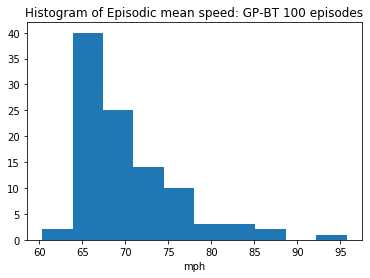

In [17]:
%%time
measure_performance(e, agent, episodes=100)